In [64]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry

In [2]:
admin = gpd.read_file('~/GEDI_PA/Matching_Layers/SEN/SEN_admin.geojson')

In [5]:
# total area for the grid
xmin, ymin, xmax, ymax= admin.total_bounds

In [6]:
#Cell Size
cell_size = 1

In [7]:
crs = '4326'

In [32]:
# create the cells in a loop
# set up empty lists to store stuff
grid_cells = []
coords = []
# np.arange() maxes a list like: np.arange(min, max, interval). This for loop iterates over the list
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    # same for the y coord
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        # works out the other cell coords by adding the cell size to the min x and y coords
        x1 = x0-cell_size
        y1 = y0+cell_size
        # creates a bbox using the shapely package and appends it to one of the lists created above
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1) )
        # Here we can check if the lower left corner is positive or negative and assign N, S, E or W to it
                # assumption here is that x0 is the lower left corner
        if x0 < 0:
            # .zfill(3) adds leading 0's to strings so that we can keep the coords consistent
            # eg, 3 degrees west would end up being W3, but we want W003 as there are 180 degrees E and W so this keeps everything consistent
            lon = f'W{x0}'.zfill(3)
        else:
            lon = f'E{x0}'.zfill(3)
        if y0 < 0:
            lat = f'S{y0}'.zfill(2)
        else:
            lat = f'N{y0}'.zfill(2) 
        # Add the coords as a string to an empty list created aove
        coords.append(f'{lat}' + f'{lon}')
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'],crs=crs) 
cell['coords'] = coords

(-17.83870752910958,
 -11.036580298308461,
 12.088004888935979,
 16.912240315670445)

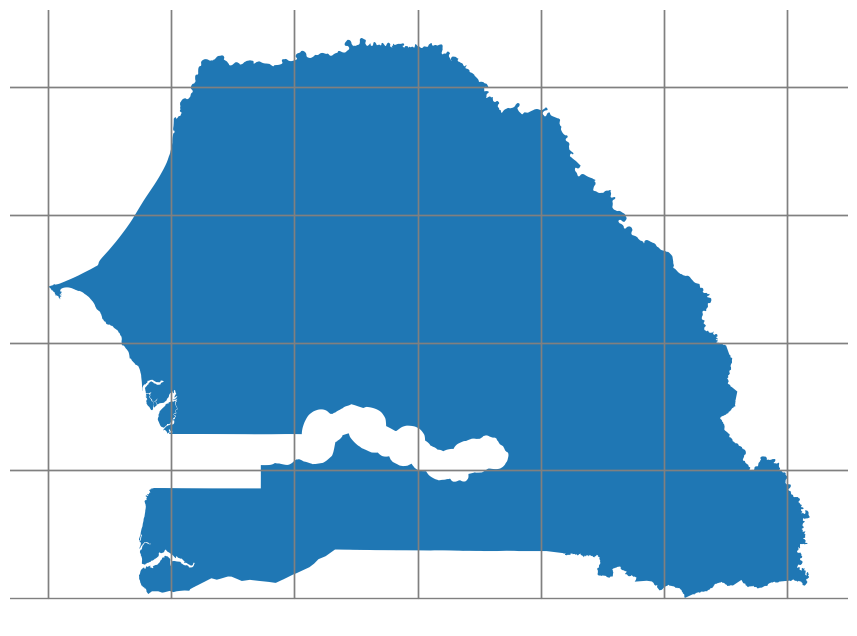

In [29]:
ax = admin.plot(markersize=.1, figsize=(12, 8))
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [33]:
print(cell)

                                             geometry  \
0   POLYGON ((-18.52952 12.30729, -18.52952 13.307...   
1   POLYGON ((-18.52952 13.30729, -18.52952 14.307...   
2   POLYGON ((-18.52952 14.30729, -18.52952 15.307...   
3   POLYGON ((-18.52952 15.30729, -18.52952 16.307...   
4   POLYGON ((-18.52952 16.30729, -18.52952 17.307...   
5   POLYGON ((-18.52952 17.30729, -18.52952 18.307...   
6   POLYGON ((-17.52952 12.30729, -17.52952 13.307...   
7   POLYGON ((-17.52952 13.30729, -17.52952 14.307...   
8   POLYGON ((-17.52952 14.30729, -17.52952 15.307...   
9   POLYGON ((-17.52952 15.30729, -17.52952 16.307...   
10  POLYGON ((-17.52952 16.30729, -17.52952 17.307...   
11  POLYGON ((-17.52952 17.30729, -17.52952 18.307...   
12  POLYGON ((-16.52952 12.30729, -16.52952 13.307...   
13  POLYGON ((-16.52952 13.30729, -16.52952 14.307...   
14  POLYGON ((-16.52952 14.30729, -16.52952 15.307...   
15  POLYGON ((-16.52952 15.30729, -16.52952 16.307...   
16  POLYGON ((-16.52952 16.3072

In [46]:
cwd = os.getcwd()
cwd

'/projects'

In [55]:
result_folder = "GEDI_PA/Matching_Layers/SEN/SEN_Tiles"
import os as os
os.listdir(result_folder)

[]

In [56]:
tiles= cell
#Set index to the correct column name, in this case "coords"
tiles.set_index('coords',inplace=True)
print(tiles.head())

                                                                                geometry
coords                                                                                  
N12.30728831742391W-17.52951992770953  POLYGON ((-18.52952 12.30729, -18.52952 13.307...
N13.30728831742391W-17.52951992770953  POLYGON ((-18.52952 13.30729, -18.52952 14.307...
N14.30728831742391W-17.52951992770953  POLYGON ((-18.52952 14.30729, -18.52952 15.307...
N15.30728831742391W-17.52951992770953  POLYGON ((-18.52952 15.30729, -18.52952 16.307...
N16.30728831742391W-17.52951992770953  POLYGON ((-18.52952 16.30729, -18.52952 17.307...


In [57]:
for col in tiles.columns:
   print(col)

geometry


In [58]:
#List out the individual aois
list_aois = tiles.index.unique().tolist() #tiles[tiles.columns[1]].values.tolist()
print(list_aois)

['N12.30728831742391W-17.52951992770953', 'N13.30728831742391W-17.52951992770953', 'N14.30728831742391W-17.52951992770953', 'N15.30728831742391W-17.52951992770953', 'N16.30728831742391W-17.52951992770953', 'N17.30728831742391W-17.52951992770953', 'N12.30728831742391W-16.52951992770953', 'N13.30728831742391W-16.52951992770953', 'N14.30728831742391W-16.52951992770953', 'N15.30728831742391W-16.52951992770953', 'N16.30728831742391W-16.52951992770953', 'N17.30728831742391W-16.52951992770953', 'N12.30728831742391W-15.52951992770953', 'N13.30728831742391W-15.52951992770953', 'N14.30728831742391W-15.52951992770953', 'N15.30728831742391W-15.52951992770953', 'N16.30728831742391W-15.52951992770953', 'N17.30728831742391W-15.52951992770953', 'N12.30728831742391W-14.52951992770953', 'N13.30728831742391W-14.52951992770953', 'N14.30728831742391W-14.52951992770953', 'N15.30728831742391W-14.52951992770953', 'N16.30728831742391W-14.52951992770953', 'N17.30728831742391W-14.52951992770953', 'N12.3072883174

In [68]:
if not os.path.exists(result_folder):
    os.makedirs(result_folder)

for rownum, subframe in tiles.groupby("coords"):
    filename = os.path.join(result_folder, f"{rownum}.geojson")
    subframe.to_file(filename, driver='GeoJSON')

len(os.listdir(result_folder))

48